In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import os
from tensorflow.keras import regularizers
# import tensorflow.keras.backend as K
# from google.colab.patches import cv2_imshow

num_epochs = 10

fairface_data = pathlib.Path("/content/raf2/train")
print(fairface_data)

# tf.compat.v1.keras.backend.tensorflow_backend._get_available_gpus()
print(tf.test.gpu_device_name())

all_sunflowers = list(fairface_data.glob('Asian/*'))
# print(all_sunflowers)
training_batch_size=32
height,width=224,224

train_set = tf.keras.preprocessing.image_dataset_from_directory(
    fairface_data,
    validation_split=0.2,
    subset="training",
    seed=200,
    image_size=(height,width),
    batch_size=training_batch_size)

# Dataset from directory doc
# https://github.com/ageron/handson-ml2

print(train_set)

image_cat = train_set.class_names
print(image_cat)


validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    fairface_data,
    validation_split=0.2,
    subset="validation",
    seed=200,
    image_size=(height, width),
    batch_size=training_batch_size)

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',
                   weights='imagenet')
for layer in pretrained_model.layers[:-15]:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
resnet_model.add(Dropout(0.5))
resnet_model.add(BatchNormalization())
resnet_model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
resnet_model.add(Dropout(0.5))
resnet_model.add(BatchNormalization())
# resnet_model.add(Dense(128, activation='relu')) #Back
# resnet_model.add(Dropout(0.5))
# resnet_model.add(BatchNormalization())
# resnet_model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# resnet_model.add(Dropout(0.5))
# resnet_model.add(BatchNormalization()) #
resnet_model.add(Dense(3, activation='sigmoid'))

resnet_model.summary()

for l in resnet_model.layers:
    print(l.name, l.trainable)

resnet_model.compile(optimizer=Adam(learning_rate=0.004),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print(1)

history = resnet_model.fit(
    train_set,
    validation_data=validation_set,
    epochs=num_epochs
    )
try:
    resnet_model.save_weights('./checkpoints/my_checkpoint_3')
except:
    pass

import cv2
image=cv2.imread(str(all_sunflowers[3]))
image_resized= cv2.resize(image, (height, width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

model_pred=resnet_model.predict(image)
predicted_class=image_cat[np.argmax(model_pred)]
print("The predicted category is", predicted_class)


image=cv2.imread(str(all_sunflowers[4]))
image_resized= cv2.resize(image, (height, width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

model_pred=resnet_model.predict(image)
predicted_class=image_cat[np.argmax(model_pred)]
print("The predicted category is", predicted_class)

image=cv2.imread(str(all_sunflowers[5]))
image_resized= cv2.resize(image, (height, width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


model_pred=resnet_model.predict(image)
predicted_class=image_cat[np.argmax(model_pred)]
print("The predicted category is", predicted_class)

image=cv2.imread(str(all_sunflowers[6]))
image_resized= cv2.resize(image, (height, width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

model_pred=resnet_model.predict(image)
predicted_class=image_cat[np.argmax(model_pred)]
print("The predicted category is", predicted_class)

# resnet_model.save_weights('./checkpoints/my_checkpoint_2')

# Cauca - 80 %
# 10 %
# 10 %

/content/raf2/train
/device:GPU:0
Found 12271 files belonging to 3 classes.
Using 9817 files for training.
<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
['African', 'Asian', 'Caucasian']
Found 12271 files belonging to 3 classes.
Using 2454 files for validation.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_30 (ModuleWr  (None, 2048)             0         
 apper)                                                          
                                                                 
 module_wrapper_31 (ModuleWr  (None, 512)              1049088   
 apper)                                                          
                

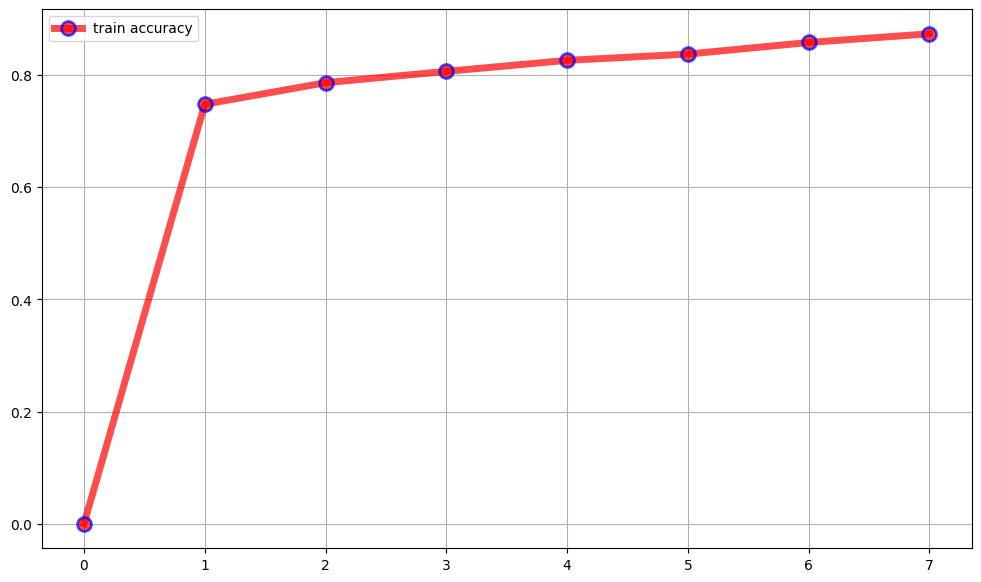

In [ ]:
x = [0, 1, 2, 3, 4, 5, 6, 7]
y1 = [0, 0.7478 , 0.7863, 0.8065, 0.8261, 0.8373, 0.8580, 0.8735]
plt.figure(figsize=(12, 7))
plt.plot(x, y1, 'o-r', alpha=0.7, label="train accuracy", lw=5, mec='b', mew=2, ms=10)
plt.legend()
plt.grid(True)

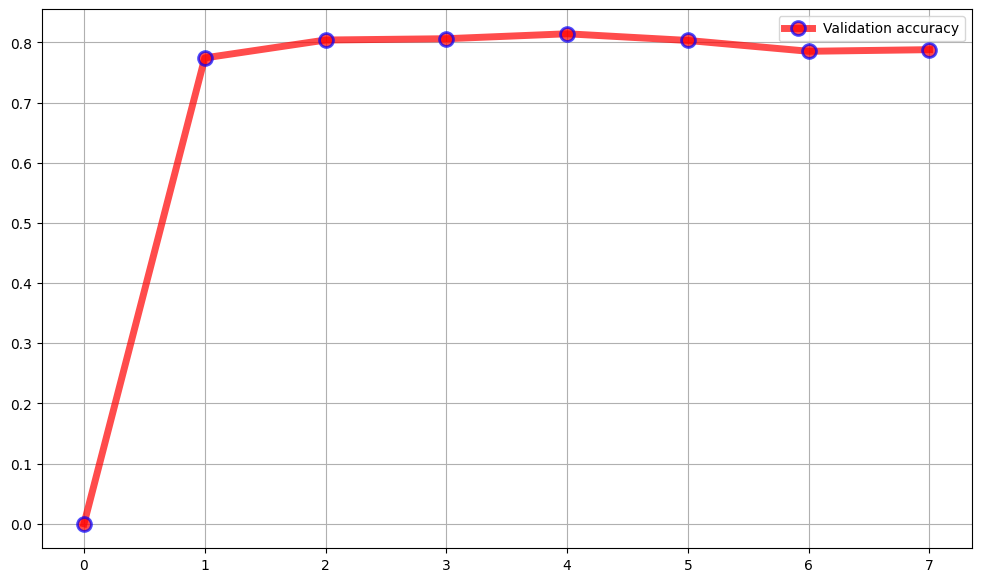

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd


x = [0, 1, 2, 3, 4, 5, 6, 7]
y1 = [0, 0.7742, 0.8039, 0.8061, 0.8143, 0.8032, 0.7852, 0.7879]
plt.figure(figsize=(12, 7))
plt.plot(x, y1, 'o-r', alpha=0.7, label="Validation accuracy", lw=5, mec='b', mew=2, ms=10)
plt.legend()
plt.grid(True)

In [ ]:
fairface_data = pathlib.Path("/content/raf4/test")
import cv2
asian = list(fairface_data.glob('Asian/*'))
caucasion = list(fairface_data.glob('Caucasian/*'))
african = list(fairface_data.glob('African/*'))

print(len(asian), len(caucasion), len(african))

asian_loss, caucasion_loss, african_loss = 0, 0, 0

array = [asian, caucasion, african]
array2 = ['Asian', 'Caucasian', 'African-American']
array3 = [asian_loss, caucasion_loss, african_loss]

for num_array in range(len(array)):
  for i in range(len(array[num_array])):
    image=cv2.imread(str(array[num_array][i]))
    image_resized= cv2.resize(image, (height, width))
    image=np.expand_dims(image_resized,axis=0)

    model_pred=resnet_model.predict(image)
    predicted_class=image_cat[np.argmax(model_pred)]
    if predicted_class != array2[num_array]:
      array3[num_array] += 1
print(array3)

# asian - 483, Caucasian - 2351, African - 234 (images on test dataset)
# asian - 1912, Caucasian -  9391, African -  968 (images on train dataset) - 9391
# [197, 451, 140]

# 2493 from each folder1 (Indian, SouAsian, EasAsian)
# 3739 from SouAsian and EasAsian
# asian - 0.5714285714285714, Caucasian - 0.09995746490854955, African - 0.61965811965 (percent of mistakes in test dataset)

# make graph on age & gender


NameError: ignored

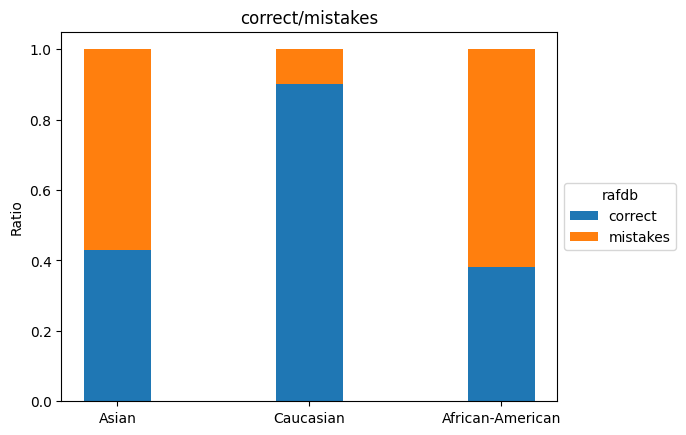

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd


correct = np.array([1-0.5714285714285714, 1-0.09995746490854955, 1-0.61965811965])
mistakes = np.array([0.5714285714285714, 0.09995746490854955, 0.61965811965])

width = 0.35
fig, ax = plt.subplots()

labels = ['Asian', 'Caucasian', 'African-American']
ax.bar(labels, correct, width, label='correct')
ax.bar(labels, mistakes, width, bottom=correct,
      label='mistakes')



ax.set_ylabel('Ratio')
ax.set_title('correct/mistakes')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='rafdb')

plt.show()



```
RESNET 18
```



In [ ]:
import os
from time import time
from tqdm import tqdm
import numpy

import torch
from torch.nn import Linear, CrossEntropyLoss
from torch.optim import Adam
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18
from torchvision.transforms import transforms


# Device

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

tfm = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


# Create Dataset
TRAIN_ROOT = "/content/drive/MyDrive/raf2/train"
TEST_ROOT = "/content/drive/MyDrive/raf2/test"

train_ds = ImageFolder(TRAIN_ROOT, transform=tfm)
test_ds = ImageFolder(TEST_ROOT, transform=tfm)
# Length of Train and Test Datasets
LEN_TRAIN = len(train_ds)
LEN_TEST = len(test_ds)
print(LEN_TRAIN, LEN_TEST)

# Index Mapping
print(train_ds.class_to_idx)


# Data Loader
train_loader = DataLoader(train_ds, batch_size = 30, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=30, shuffle = True)


model = resnet18(pretrained=True)

# Replace Output of Fully Connected Layer with Number of Labels for our Classification Problem
model.fc = Linear(in_features=512, out_features=3)
model = model.to(device)

optimiser = Adam(model.parameters(), lr=3e-4, weight_decay=0.0001)

# Loss Function
loss_fn = CrossEntropyLoss()

for epoch in range(10):
    start = time()

    tr_acc = 0
    test_acc = 0

    # Train
    model.train()

    with tqdm(train_loader, unit="batch") as tepoch:
        for xtrain, ytrain in tepoch:
            optimiser.zero_grad()

            xtrain = xtrain.to(device)
            train_prob = model(xtrain)
            train_prob = train_prob.cpu()

            loss = loss_fn(train_prob, ytrain)
            loss.backward()
            optimiser.step()

            # training ends

            train_pred = torch.max(train_prob, 1).indices
            tr_acc += int(torch.sum(train_pred == ytrain))

        ep_tr_acc = tr_acc / LEN_TRAIN

    # Evaluate
    model.eval()
    with torch.no_grad():
        for xtest, ytest in test_loader:
            xtest = xtest.to(device)
            test_prob = model(xtest)
            test_prob = test_prob.cpu()

            test_pred = torch.max(test_prob, 1).indices
            test_acc += int(torch.sum(test_pred == ytest))

        ep_test_acc = test_acc / LEN_TEST

    end = time()
    duration = (end - start) / 60

    print(f"Epoch: {epoch}, Time: {duration}, Loss: {loss}\nTrain_acc: {ep_tr_acc}, Test_acc: {ep_test_acc}")


try:
  save_path = 'weight1.pth'
  torch.save(model.state_dict(), save_path)

except:
  pass

cuda
12281 3068
{'African': 0, 'Asian': 1, 'Caucasian': 2}


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 410/410 [1:24:47<00:00, 12.41s/batch]


Epoch: 0, Time: 124.97425319751103, Loss: 0.3257710337638855
Train_acc: 0.807914664929566, Test_acc: 0.8451760104302477


100%|██████████| 410/410 [00:29<00:00, 13.83batch/s]


Epoch: 1, Time: 0.6079686085383097, Loss: 0.2799692153930664
Train_acc: 0.8533507043400375, Test_acc: 0.8546284224250326


100%|██████████| 410/410 [00:29<00:00, 14.04batch/s]


Epoch: 2, Time: 0.6016973614692688, Loss: 0.710197389125824
Train_acc: 0.8671932253073854, Test_acc: 0.8526727509778357


100%|██████████| 410/410 [00:29<00:00, 13.79batch/s]


Epoch: 3, Time: 0.6073641896247863, Loss: 0.29782524704933167
Train_acc: 0.8746844719485384, Test_acc: 0.8660365058670143


100%|██████████| 410/410 [00:29<00:00, 13.95batch/s]


Epoch: 4, Time: 0.6009257833162943, Loss: 0.2628951370716095
Train_acc: 0.885921341910268, Test_acc: 0.8389830508474576


100%|██████████| 410/410 [00:29<00:00, 13.81batch/s]


Epoch: 5, Time: 0.6048543175061544, Loss: 0.40570059418678284
Train_acc: 0.8922726162364628, Test_acc: 0.8709256844850065


100%|██████████| 410/410 [00:29<00:00, 13.87batch/s]


Epoch: 6, Time: 0.6044246355692545, Loss: 0.5026387572288513
Train_acc: 0.9029395000407133, Test_acc: 0.8673402868318123


100%|██████████| 410/410 [00:29<00:00, 13.93batch/s]


Epoch: 7, Time: 0.608207368850708, Loss: 0.06039562076330185
Train_acc: 0.9104307466818663, Test_acc: 0.8653846153846154


100%|██████████| 410/410 [00:29<00:00, 13.81batch/s]


Epoch: 8, Time: 0.6080500880877177, Loss: 0.3261280357837677
Train_acc: 0.9137692370328149, Test_acc: 0.8696219035202086


100%|██████████| 410/410 [00:29<00:00, 13.88batch/s]


Epoch: 9, Time: 0.603584333260854, Loss: 0.36476704478263855
Train_acc: 0.9196319517954564, Test_acc: 0.8627770534550195


In [ ]:
save_path = 'weight1.pth'
torch.save(model.state_dict(), save_path)

In [ ]:
k = 0
asian, caucasian, african = 0, 0, 0
asianT, caucasianT, africanT = 0, 0, 0
for xtest, ytest in test_loader:
    print(k)
    k += 1
    # input_sequence =
    xtest = xtest.to(device)
    test_prob = model(xtest)
    test_prob = test_prob.cpu()

    test_pred = torch.max(test_prob, 1).indices
    # print(len(test_pred))
    for i in range(len(test_pred)):
      if test_pred[i] != ytest[i]:
        if ytest[i] == 1 or ytest[i] == '1':
          asian += 1
        elif ytest[i] == 2 or ytest[i] == '2':
          caucasian += 1
        elif ytest[i] == 0 or ytest[i] == '0':
          african += 1
      if ytest[i] == 1 or ytest[i] == '1':
          asianT += 1
      elif ytest[i] == 2 or ytest[i] == '2':
        caucasianT += 1
      elif ytest[i] == 0 or ytest[i] == '0':
        africanT += 1
    # test_acc += int(torch.sum(test_pred == ytest))
    # print(test_pred, ytest)
print(asian, caucasian, african)
print(asianT, caucasianT, africanT)

# 244 64 110
# 483 2351 234

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
244 64 110
483 2351 234


In [ ]:
import os
from time import time
from tqdm import tqdm
import numpy

import torch
from torch.nn import Linear, CrossEntropyLoss
from torch.optim import Adam
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18
from torchvision.transforms import transforms


# Device

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

tfm = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


# Create Dataset
TRAIN_ROOT = "/content/drive/MyDrive/raf3/train"
TEST_ROOT = "/content/drive/MyDrive/raf3/test"

train_ds = ImageFolder(TRAIN_ROOT, transform=tfm)
test_ds = ImageFolder(TEST_ROOT, transform=tfm)
# Length of Train and Test Datasets
LEN_TRAIN = len(train_ds)
LEN_TEST = len(test_ds)
print(LEN_TRAIN, LEN_TEST)

# Index Mapping
print(train_ds.class_to_idx)


# Data Loader
train_loader = DataLoader(train_ds, batch_size = 30, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=30, shuffle = True)


model = resnet18(pretrained=True)

# Replace Output of Fully Connected Layer with Number of Labels for our Classification Problem
model.fc = Linear(in_features=512, out_features=3)
model = model.to(device)

optimiser = Adam(model.parameters(), lr=3e-4, weight_decay=0.0001)

# Loss Function
loss_fn = CrossEntropyLoss()

for epoch in range(10):
    start = time()

    tr_acc = 0
    test_acc = 0

    # Train
    model.train()

    with tqdm(train_loader, unit="batch") as tepoch:
        for xtrain, ytrain in tepoch:
            optimiser.zero_grad()

            xtrain = xtrain.to(device)
            train_prob = model(xtrain)
            train_prob = train_prob.cpu()

            loss = loss_fn(train_prob, ytrain)
            loss.backward()
            optimiser.step()

            # training ends

            train_pred = torch.max(train_prob, 1).indices
            tr_acc += int(torch.sum(train_pred == ytrain))

        ep_tr_acc = tr_acc / LEN_TRAIN

    # Evaluate
    model.eval()
    with torch.no_grad():
        for xtest, ytest in test_loader:
            xtest = xtest.to(device)
            test_prob = model(xtest)
            test_prob = test_prob.cpu()

            test_pred = torch.max(test_prob, 1).indices
            test_acc += int(torch.sum(test_pred == ytest))

        ep_test_acc = test_acc / LEN_TEST

    end = time()
    duration = (end - start) / 60

    print(f"Epoch: {epoch}, Time: {duration}, Loss: {loss}\nTrain_acc: {ep_tr_acc}, Test_acc: {ep_test_acc}")


try:
  save_path = 'weight2.pth'
  torch.save(model.state_dict(), save_path)

except:
  pass

cuda
28749 3068
{'African': 0, 'Asian': 1, 'Caucasian': 2}


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 959/959 [2:07:08<00:00,  7.95s/batch]


Epoch: 0, Time: 164.04739119609198, Loss: 0.14031849801540375
Train_acc: 0.8415597064245713, Test_acc: 0.8412646675358539


100%|██████████| 959/959 [01:27<00:00, 10.91batch/s]


Epoch: 1, Time: 1.5933489402135212, Loss: 0.18493768572807312
Train_acc: 0.8859090750982643, Test_acc: 0.8585397653194263


100%|██████████| 959/959 [01:28<00:00, 10.81batch/s]


Epoch: 2, Time: 1.6073910315831503, Loss: 0.1099899634718895
Train_acc: 0.8984312497826011, Test_acc: 0.8572359843546284


100%|██████████| 959/959 [01:35<00:00, 10.05batch/s]


Epoch: 3, Time: 1.7197567542394003, Loss: 0.8586251735687256
Train_acc: 0.905353229677554, Test_acc: 0.8552803129074316


100%|██████████| 959/959 [01:29<00:00, 10.71batch/s]


Epoch: 4, Time: 1.6202676653862, Loss: 0.0660797730088234
Train_acc: 0.9125882639396153, Test_acc: 0.8696219035202086


100%|██████████| 959/959 [01:29<00:00, 10.76batch/s]


Epoch: 5, Time: 1.6106212774912516, Loss: 0.12903013825416565
Train_acc: 0.9162753487077812, Test_acc: 0.8657105606258149


100%|██████████| 959/959 [01:28<00:00, 10.88batch/s]


Epoch: 6, Time: 1.598319403330485, Loss: 0.783087432384491
Train_acc: 0.9200320011130821, Test_acc: 0.8624511082138201


100%|██████████| 959/959 [01:29<00:00, 10.73batch/s]


Epoch: 7, Time: 1.6232727726300558, Loss: 0.10025688260793686
Train_acc: 0.9281714146579011, Test_acc: 0.8624511082138201


100%|██████████| 959/959 [01:29<00:00, 10.76batch/s]


Epoch: 8, Time: 1.6136578996976216, Loss: 0.23504048585891724
Train_acc: 0.9315454450589585, Test_acc: 0.871251629726206


100%|██████████| 959/959 [01:29<00:00, 10.77batch/s]


Epoch: 9, Time: 1.611593250433604, Loss: 0.6740055680274963
Train_acc: 0.9356847194685033, Test_acc: 0.8692959582790091


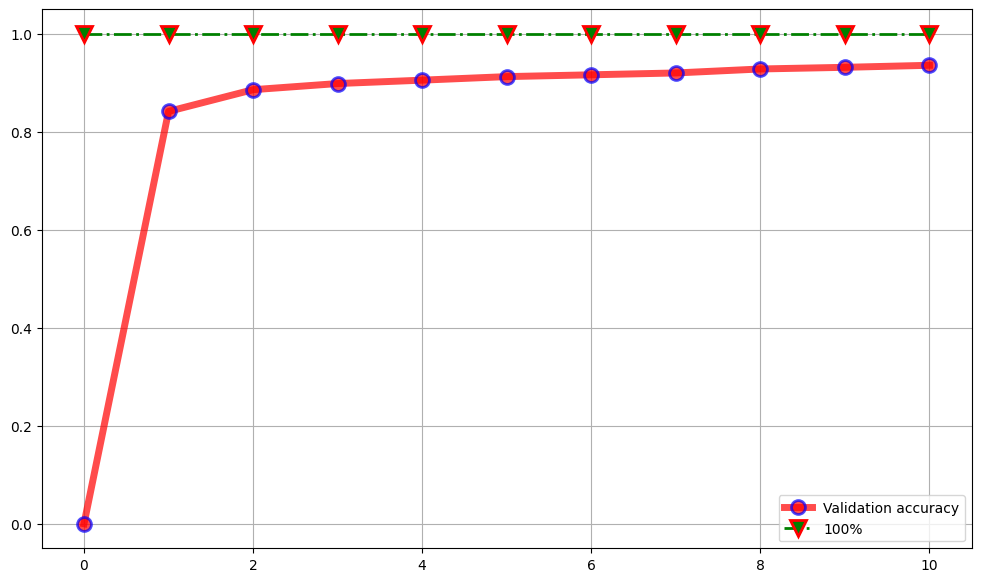

In [ ]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = [0,0.8415597064245713, 0.8859090750982643, 0.8984312497826011, 0.905353229677554, 0.9125882639396153, 0.9162753487077812, 0.9200320011130821, 0.9281714146579011, 0.9315454450589585, 0.9356847194685033]
y2 = [1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1]
plt.figure(figsize=(12, 7))
plt.plot(x, y1, 'o-r', alpha=0.7, label="Validation accuracy", lw=5, mec='b', mew=2, ms=10)
plt.plot(x, y2, 'v-.g', label="100%", mec='r', lw=2, mew=2, ms=12)
plt.legend()
plt.grid(True)

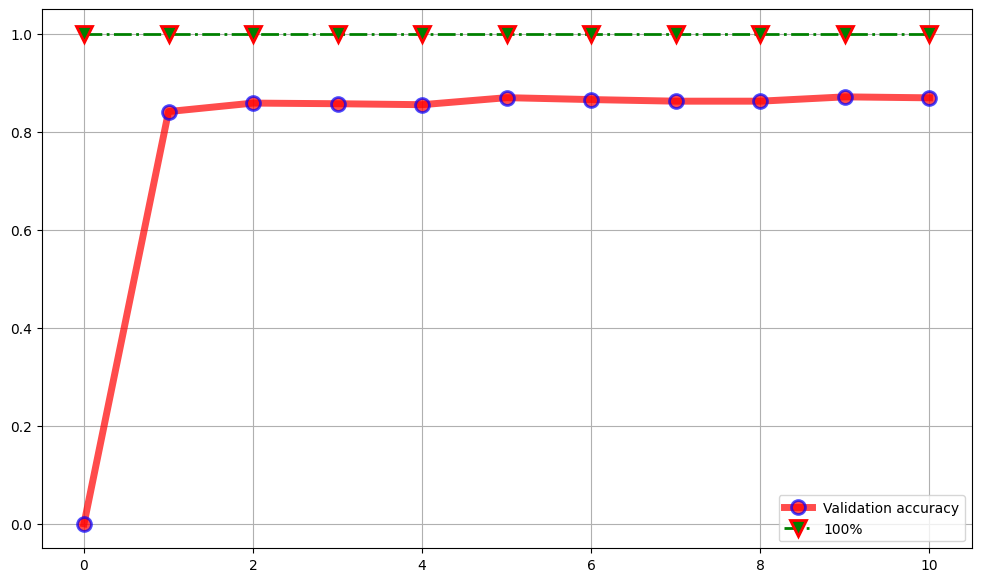

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = [0,0.8412646675358539, 0.8585397653194263, 0.8572359843546284, 0.8552803129074316, 0.8696219035202086, 0.8657105606258149, 0.8624511082138201, 0.8624511082138201, 0.871251629726206, 0.8692959582790091]
y2 = [1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1]
plt.figure(figsize=(12, 7))
plt.plot(x, y1, 'o-r', alpha=0.7, label="Validation accuracy", lw=5, mec='b', mew=2, ms=10)
plt.plot(x, y2, 'v-.g', label="100%", mec='r', lw=2, mew=2, ms=12)
plt.legend()
plt.grid(True)



In [ ]:
k = 0
asian, caucasian, african = 0, 0, 0
asianT, caucasianT, africanT = 0, 0, 0
for xtest, ytest in test_loader:
    # print(k)
    k += 1
    # input_sequence =
    xtest = xtest.to(device)
    test_prob = model(xtest)
    test_prob = test_prob.cpu()

    test_pred = torch.max(test_prob, 1).indices
    # print(len(test_pred))
    for i in range(len(test_pred)):
      if test_pred[i] != ytest[i]:
        if ytest[i] == 1 or ytest[i] == '1':
          asian += 1
        elif ytest[i] == 2 or ytest[i] == '2':
          caucasian += 1
        elif ytest[i] == 0 or ytest[i] == '0':
          african += 1
      if ytest[i] == 1 or ytest[i] == '1':
          asianT += 1
      elif ytest[i] == 2 or ytest[i] == '2':
        caucasianT += 1
      elif ytest[i] == 0 or ytest[i] == '0':
        africanT += 1
print(asian, caucasian, african)
print(asianT, caucasianT, africanT)
try:
  save_path = 'weight3.pth'
  torch.save(model.state_dict(), save_path)
  print("Done")
except:
  pass
# 203 108 89
# 483 2351 234

203 108 89
483 2351 234
Done


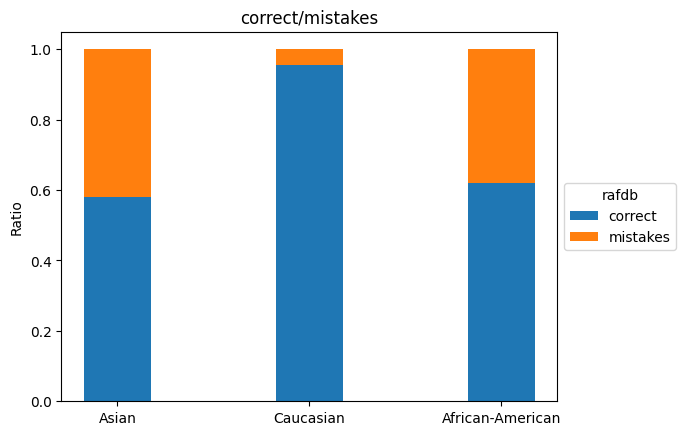

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd


correct = np.array([1-203/483, 1-108/2351, 1-89/234])
mistakes = np.array([203/483, 108/2351, 89/234])

width = 0.35
fig, ax = plt.subplots()

labels = ['Asian', 'Caucasian', 'African-American']
ax.bar(labels, correct, width, label='correct')
ax.bar(labels, mistakes, width, bottom=correct,
      label='mistakes')



ax.set_ylabel('Ratio')
ax.set_title('correct/mistakes')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='rafdb')

plt.show()

In [ ]:
import os
from time import time
from tqdm import tqdm
import numpy

import torch
from torch.nn import Linear, CrossEntropyLoss
from torch.optim import Adam
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18
from torchvision.transforms import transforms


# Device

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

tfm = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


# Create Dataset
TRAIN_ROOT = "/content/drive/MyDrive/raf3/train"
TEST_ROOT = "/content/drive/MyDrive/raf3/test"

train_ds = ImageFolder(TRAIN_ROOT, transform=tfm)
test_ds = ImageFolder(TEST_ROOT, transform=tfm)
# Length of Train and Test Datasets
LEN_TRAIN = len(train_ds)
LEN_TEST = len(test_ds)
print(LEN_TRAIN, LEN_TEST)

# Index Mapping
print(train_ds.class_to_idx)


# Data Loader
train_loader = DataLoader(train_ds, batch_size = 30, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=30, shuffle = True)


model = resnet18(pretrained=True)

# Replace Output of Fully Connected Layer with Number of Labels for our Classification Problem
model.fc = Linear(in_features=512, out_features=3)
model = model.to(device)

optimiser = Adam(model.parameters(), lr=3e-4, weight_decay=0.0001)

# Loss Function
loss_fn = CrossEntropyLoss()

for epoch in range(10):
    start = time()

    tr_acc = 0
    test_acc = 0

    # Train
    model.train()

    with tqdm(train_loader, unit="batch") as tepoch:
        for xtrain, ytrain in tepoch:
            optimiser.zero_grad()

            xtrain = xtrain.to(device)
            train_prob = model(xtrain)
            train_prob = train_prob.cpu()

            loss = loss_fn(train_prob, ytrain)
            loss.backward()
            optimiser.step()

            # training ends

            train_pred = torch.max(train_prob, 1).indices
            tr_acc += int(torch.sum(train_pred == ytrain))

        ep_tr_acc = tr_acc / LEN_TRAIN

    # Evaluate
    model.eval()
    with torch.no_grad():
        for xtest, ytest in test_loader:
            xtest = xtest.to(device)
            test_prob = model(xtest)
            test_prob = test_prob.cpu()

            test_pred = torch.max(test_prob, 1).indices
            test_acc += int(torch.sum(test_pred == ytest))

        ep_test_acc = test_acc / LEN_TEST

    end = time()
    duration = (end - start) / 60

    print(f"Epoch: {epoch}, Time: {duration}, Loss: {loss}\nTrain_acc: {ep_tr_acc}, Test_acc: {ep_test_acc}")
try:
  save_path = 'weight1'
  torch.save(model.state_dict(), save_path)
except:


# Default ->
# -> 33% -> (Gender, age, etc..)
# -> ...
# 45 % 45 % 10% (Gender, age, etc..) ->
# ... ->
# -> Augm.
#

cuda
19749 3068
{'African': 0, 'Asian': 1, 'Caucasian': 2}


100%|██████████| 659/659 [1:02:21<00:00,  5.68s/batch]


Epoch: 0, Time: 72.52819590965906, Loss: 0.1305117905139923
Train_acc: 0.8695630158489037, Test_acc: 0.8451760104302477


100%|██████████| 659/659 [00:47<00:00, 13.82batch/s]


Epoch: 1, Time: 0.881076963742574, Loss: 0.05982067808508873
Train_acc: 0.9031849713909565, Test_acc: 0.8559322033898306


100%|██████████| 659/659 [00:47<00:00, 13.87batch/s]


Epoch: 2, Time: 0.8825107256571452, Loss: 0.1744595170021057
Train_acc: 0.9156919337687984, Test_acc: 0.8533246414602347


100%|██████████| 659/659 [00:47<00:00, 13.86batch/s]


Epoch: 3, Time: 0.8785857955614725, Loss: 0.15906153619289398
Train_acc: 0.9193883234594157, Test_acc: 0.8670143415906127


100%|██████████| 659/659 [00:47<00:00, 13.92batch/s]


Epoch: 4, Time: 0.88128133614858, Loss: 0.055707018822431564
Train_acc: 0.9231859841004608, Test_acc: 0.8559322033898306


100%|██████████| 659/659 [00:47<00:00, 13.78batch/s]


Epoch: 5, Time: 0.8937019467353821, Loss: 0.03819122910499573
Train_acc: 0.9262241126132968, Test_acc: 0.8660365058670143


100%|██████████| 659/659 [00:47<00:00, 13.87batch/s]


Epoch: 6, Time: 0.879113248984019, Loss: 0.038578588515520096
Train_acc: 0.931591472985974, Test_acc: 0.8663624511082139


100%|██████████| 659/659 [00:47<00:00, 13.82batch/s]


Epoch: 7, Time: 0.882693636417389, Loss: 0.6132978200912476
Train_acc: 0.9351359562509494, Test_acc: 0.8673402868318123


100%|██████████| 659/659 [00:47<00:00, 13.84batch/s]


Epoch: 8, Time: 0.8812589168548584, Loss: 0.026949329301714897
Train_acc: 0.9401995037723428, Test_acc: 0.8552803129074316


100%|██████████| 659/659 [00:47<00:00, 13.95batch/s]


Epoch: 9, Time: 0.8764610807100932, Loss: 0.6368534564971924
Train_acc: 0.9404526811484126, Test_acc: 0.8657105606258149


In [ ]:
save_path = 'weight1.pth'
torch.save(model.state_dict(), save_path)

In [ ]:
k = 0
for xtest, ytest in test_loader:
  if k <= 10:
    k += 1
    # input_sequence =
    xtest = xtest.to(device)
    test_prob = model(xtest)
    test_prob = test_prob.cpu()

    test_pred = torch.max(test_prob, 1).indices
    # test_acc += int(torch.sum(test_pred == ytest))
    print(test_pred, ytest)
  else:
    break

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 1, 2]) tensor([1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2,
        1, 2, 2, 2, 1, 2])
tensor([2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 1, 2, 2]) tensor([1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
        2, 0, 2, 2, 2, 0])
tensor([2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
        2, 1, 2, 2, 2, 1]) tensor([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0,
        2, 2, 2, 1, 2, 2])
tensor([1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 0, 0]) tensor([2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
        2, 2, 2, 2, 0, 0])
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2]) tensor([2, 2, 1, 2, 2, 1, 0, 2, 1, 2,

KeyboardInterrupt: ignored

In [ ]:
from collections import Counter
import numpy as np
import csv
import os
import random
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
import os
total = []

k = 0
dir = 'raf1'
# os.mkdir(f"/content/{dir}/test/Caucasian")
# os.mkdir(f"/content/{dir}/test/African")
# os.mkdir(f"/content/{dir}/test/Asian")

os.mkdir(f"/content/{dir}/train/Caucasian")
os.mkdir(f"/content/{dir}/train/African")
os.mkdir(f"/content/{dir}/train/Asian")


kia = 0
with open("/content/rafdbcsv.csv", 'r') as file:
    csvreader = csv.reader(file)
    for row in csvreader:
        if row:
            kia += 1
        if kia <3070 and row:
            try:
              if str(row[2]) == "Caucasian":
                  shutil.copy2(
                      f"/content/drive/MyDrive/SRP_HS_23_Datasets/RAF/Images/aligned/{row[0]}",
                      f"/content/{dir}/test/Caucasian")

              elif str(row[2]) == "African-American":
                  shutil.copy2(
                      f"/content/drive/MyDrive/SRP_HS_23_Datasets/RAF/Images/aligned/{row[0]}",
                      f"/content/{dir}/test/African")
              elif str(row[2]) == "Asian":
                  shutil.copy2(
                      f"/content/drive/MyDrive/SRP_HS_23_Datasets/RAF/Images/aligned/{row[0]}",
                      f"/content/{dir}/test/Asian")

              else:
                  print(str(row[2]))
            except:
              print(str(row))
        if kia >= 3070 and row:
            if str(row[2]) == "Caucasian":
                shutil.copy2(
                    f"/content/drive/MyDrive/SRP_HS_23_Datasets/RAF/Images/aligned/{row[0]}",
                    f"/content/{dir}/train/Caucasian")

            elif str(row[2]) == "African-American":
                shutil.copy2(
                    f"/content/drive/MyDrive/SRP_HS_23_Datasets/RAF/Images/aligned/{row[0]}",
                    f"/content/{dir}/train/African")
            elif str(row[2]) == "Asian":
                shutil.copy2(
                    f"/content/drive/MyDrive/SRP_HS_23_Datasets/RAF/Images/aligned/{row[0]}",
                    f"/content/{dir}/train/Asian")

            else:
                print(str(row[2]))



race


# After new data

43%  /5%              /52%
-
Asian/African-American/Caucasian

In [ ]:
from collections import Counter
import numpy as np
import csv
import os
import random
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
import os
total = []

k = 0
dir = 'raf3'
os.mkdir(f"/content/{dir}/test/Caucasian")
os.mkdir(f"/content/{dir}/test/African")
os.mkdir(f"/content/{dir}/test/Asian")

os.mkdir(f"/content/{dir}/train/Caucasian")
os.mkdir(f"/content/{dir}/train/African")
os.mkdir(f"/content/{dir}/train/Asian")


kia = 0
with open("/content/rafdbcsv.csv", 'r') as file:
    csvreader = csv.reader(file)
    for row in csvreader:

        if row:
            kia += 1
        if kia < 3070 and row:
            try:
                if str(row[2]) == "Caucasian":
                  shutil.copy2(
                      f"/content/drive/MyDrive/SRP_HS_23_Datasets/RAF/Images/aligned/{row[0]}",
                      f"/content/{dir}/test/Caucasian")

                elif str(row[2]) == "African-American":
                    shutil.copy2(
                        f"/content/drive/MyDrive/SRP_HS_23_Datasets/RAF/Images/aligned/{row[0]}",
                        f"/content/{dir}/test/African")
                elif str(row[2]) == "Asian":
                    shutil.copy2(
                        f"/content/drive/MyDrive/SRP_HS_23_Datasets/RAF/Images/aligned/{row[0]}",
                        f"/content/{dir}/test/Asian")

                else:
                    print(str(row[2]))
            except:
                print(str(row))
        if kia >= 3070 and row:
            if str(row[2]) == "Caucasian":
                shutil.copy2(
                    f"/content/drive/MyDrive/SRP_HS_23_Datasets/RAF/Images/aligned/{row[0]}",
                    f"/content/{dir}/train/Caucasian")

            elif str(row[2]) == "African-American":
                shutil.copy2(
                    f"/content/drive/MyDrive/SRP_HS_23_Datasets/RAF/Images/aligned/{row[0]}",
                    f"/content/{dir}/train/African")
            elif str(row[2]) == "Asian":
                shutil.copy2(
                    f"/content/drive/MyDrive/SRP_HS_23_Datasets/RAF/Images/aligned/{row[0]}",
                    f"/content/{dir}/train/Asian")

            else:
                print(str(row[2]))

    with open("/content/fairface_label_train.csv", 'r') as f:
        eas, sou = 0, 0
        limit = 3739
        csvreadert = csv.reader(f)
        for row in csvreadert:
            if row:
                if row[3] == "East Asian" and eas < limit:
                    eas += 1
                    try:
                        shutil.copy2(
                            f"/content/drive/MyDrive/SRP_HS_23_Datasets/FairFace/Images/train/{row[0][6:]}",
                            f"/content/{dir}/train/Asian")
                    except:
                        print(str(row))
                elif row[3] == "Southeast Asian" and sou < limit:
                    sou += 1
                    try:
                        shutil.copy2(
                            f"/content/drive/MyDrive/SRP_HS_23_Datasets/FairFace/Images/train/{row[0][6:]}",
                            f"/content/{dir}/train/Asian")
                    except:
                        print(str(row))




race


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import os
from tensorflow.keras import regularizers
# import tensorflow.keras.backend as K
from google.colab.patches import cv2_imshow

num_epochs = 10

fairface_data = pathlib.Path("/content/drive/MyDrive/raf3/train")
raf_test = pathlib.Path("/content/drive/MyDrive/raf3/test")
print(fairface_data)

# tf.compat.v1.keras.backend.tensorflow_backend._get_available_gpus()
print(tf.test.gpu_device_name())

all_sunflowers = list(fairface_data.glob('Asian/*'))
print(len(all_sunflowers))
training_batch_size=32
height,width=224,224

train_set = tf.keras.preprocessing.image_dataset_from_directory(
    fairface_data,
    validation_split=0.001,
    subset="training",
    seed=200,
    image_size=(height,width),
    batch_size=training_batch_size)

# Dataset from directory doc
# https://github.com/ageron/handson-ml2

print(train_set)

image_cat = train_set.class_names
print(image_cat)


validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    raf_test,
    validation_split=0.999,
    subset="validation",
    seed=200,
    image_size=(height, width),
    batch_size=training_batch_size)

resnet_model_new = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',
                   weights='imagenet')
for layer in pretrained_model.layers[:-15]:
        layer.trainable=False

resnet_model_new.add(pretrained_model)
resnet_model_new.add(Flatten())
resnet_model_new.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
resnet_model_new.add(Dropout(0.5))
resnet_model_new.add(BatchNormalization())
resnet_model_new.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
resnet_model_new.add(Dropout(0.5))
resnet_model_new.add(BatchNormalization())
resnet_model_new.add(Dense(3, activation='sigmoid'))

resnet_model_new.summary()

for l in resnet_model_new.layers:
    print(l.name, l.trainable)

resnet_model_new.compile(optimizer=Adam(learning_rate=0.004),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print(1)

history = resnet_model_new.fit(
    train_set,
    validation_data=validation_set,
    epochs=num_epochs
    )
try:
    resnet_model_new.save_weights('./checkpoints/my_checkpoint_3')
except:
    pass

import cv2
image=cv2.imread(str(all_sunflowers[3]))
image_resized= cv2.resize(image, (height, width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

model_pred=resnet_model_new.predict(image)
predicted_class=image_cat[np.argmax(model_pred)]
print("The predicted category is", predicted_class)


image=cv2.imread(str(all_sunflowers[4]))
image_resized= cv2.resize(image, (height, width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

model_pred=resnet_model_new.predict(image)
predicted_class=image_cat[np.argmax(model_pred)]
print("The predicted category is", predicted_class)

image=cv2.imread(str(all_sunflowers[5]))
image_resized= cv2.resize(image, (height, width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


model_pred=resnet_model_new.predict(image)
predicted_class=image_cat[np.argmax(model_pred)]
print("The predicted category is", predicted_class)

image=cv2.imread(str(all_sunflowers[6]))
image_resized= cv2.resize(image, (height, width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

model_pred=resnet_model_new.predict(image)
predicted_class=image_cat[np.argmax(model_pred)]
print("The predicted category is", predicted_class)

resnet_model_new.save_weights('./checkpoints/my_checkpoint_2')

# Cauca - 80 %
# 10 %
# 10 %

/content/drive/MyDrive/raf3/train
/device:GPU:0
9390
Found 19749 files belonging to 3 classes.
Using 19730 files for training.
<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
['African', 'Asian', 'Caucasian']
Found 3068 files belonging to 3 classes.
Using 3064 files for validation.
94765736/94765736 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import os
from tensorflow.keras import regularizers
# import tensorflow.keras.backend as K
from google.colab.patches import cv2_imshow


fairface_data = pathlib.Path("/content/drive/MyDrive/raf1/test")
import cv2
asian = list(fairface_data.glob('Asian/*'))
caucasion = list(fairface_data.glob('Caucasian/*'))
african = list(fairface_data.glob('African/*'))


print(len(asian), len(caucasion), len(african))

asian_loss, caucasion_loss, african_loss = 0, 0, 0

array = [asian, caucasion, african]
array2 = ['Asian', 'Caucasian', 'African']
array3 = [asian_loss, caucasion_loss, african_loss]
images_failed = []

for num_array in range(len(array)):
  for i in range(len(array[num_array])):
    image=cv2.imread(str(array[num_array][i]))
    image_resized= cv2.resize(image, (height, width))
    image=np.expand_dims(image_resized,axis=0)

    model_pred=resnet_model_new.predict(image)
    predicted_class=image_cat[np.argmax(model_pred)]
    if predicted_class != array2[num_array]:
      array3[num_array] += 1
      images_failed.append(str(array[num_array][i]).split('\\')[-1])
      print(str(array[num_array][i]).split('\\')[-1])



print("FINAL RESULTS of race:")
print(array3)


# /[195, 466, 119]
# 483 2351 234

483 2351 234
1/1 [==============================] - 0s 23ms/step
/content/drive/MyDrive/raf1/test/Asian/test_0021_aligned.jpg
1/1 [==============================] - 0s 23ms/step
/content/drive/MyDrive/raf1/test/Asian/test_0012_aligned.jpg
1/1 [==============================] - 0s 24ms/step
/content/drive/MyDrive/raf1/test/Asian/test_0014_aligned.jpg
1/1 [==============================] - 0s 25ms/step
/content/drive/MyDrive/raf1/test/Asian/test_0020_aligned.jpg
1/1 [==============================] - 0s 22ms/step
/content/drive/MyDrive/raf1/test/Asian/test_0054_aligned.jpg
1/1 [==============================] - 0s 21ms/step
/content/drive/MyDrive/raf1/test/Asian/test_0065_aligned.jpg
1/1 [==============================] - 0s 22ms/step
/content/drive/MyDrive/raf1/test/Asian/test_0045_aligned.jpg
1/1 [==============================] - 0s 22ms/step
/content/drive/MyDrive/raf1/test/Asian/test_0081_aligned.jpg
1/1 [==============================] - 0s 23ms/step
/content/drive/MyDrive/raf1/tes

In [ ]:
# print(images_failed[6])
arr = []
for i in images_failed:
  arr.append(int(i.split('_')[1]))
arr.sort()

import csv
k = 0
fem, male = 0, 0
zero, chet, dvad, sor, old = 0, 0, 0, 0, 0
femG, maleG = 0, 0
zeroG, chetG, dvadG, sorG, oldG = 0, 0, 0, 0, 0
with open("/content/rafdbcsv.csv", 'r') as file:
    csvreader = csv.reader(file)
    for row in csvreader:
        print(row[0])
        if row and ((int(row[0].split('_')[1])) == arr[k]):
            print(k)
            k += 1
            if row[1] == "female":
                fem += 1
            elif row[1] == "male":
                male += 1

            if row[4] == "0-3":
                zero += 1
            elif row[4] == "4-19":
                chet += 1
            elif row[4] == "20-39":
                dvad += 1
            elif row[4] == "40-69":
                sor += 1
            elif row[4] == "70+":
                old += 1
        elif row:
            if row[1] == "female":
                femG += 1
            elif row[1] == "male":
                maleG += 1

            if row[4] == "0-3":
                zeroG += 1
            elif row[4] == "4-19":
                chetG += 1
            elif row[4] == "20-39":
                dvadG += 1
            elif row[4] == "40-69":
                sorG += 1
            elif row[4] == "70+":
                oldG += 1


print("FINAL RESULTS of gender and age:")
print(fem/(femG + fem), male/(maleG + male))
print(zero/zeroG, chet/chetG, dvad/dvadG, sor/sorG, old/oldG)

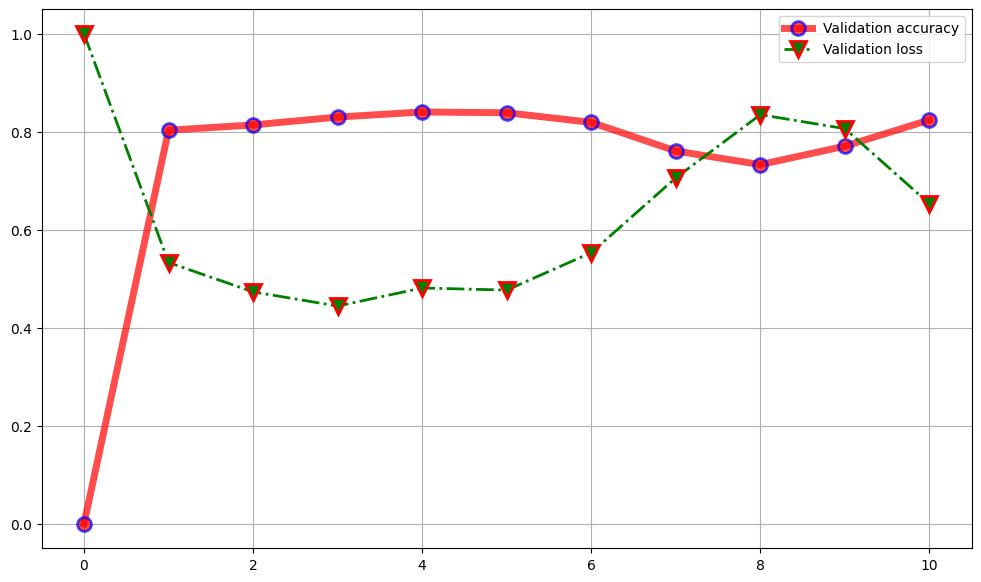

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = [0,0.8032, 0.8140, 0.8300, 0.8404, 0.8388, 0.8192, 0.7608, 0.7330, 0.7706, 0.8241]
y2 = [1, 0.5332,0.4733 , 0.4443 , 0.4812, 0.4769 , 0.5533 , 0.7061 , 0.8349 , 0.8064 , 0.6529 ]
plt.figure(figsize=(12, 7))
plt.plot(x, y1, 'o-r', alpha=0.7, label="Validation accuracy", lw=5, mec='b', mew=2, ms=10)
plt.plot(x, y2, 'v-.g', label="Validation loss", mec='r', lw=2, mew=2, ms=12)
plt.legend()
plt.grid(True)

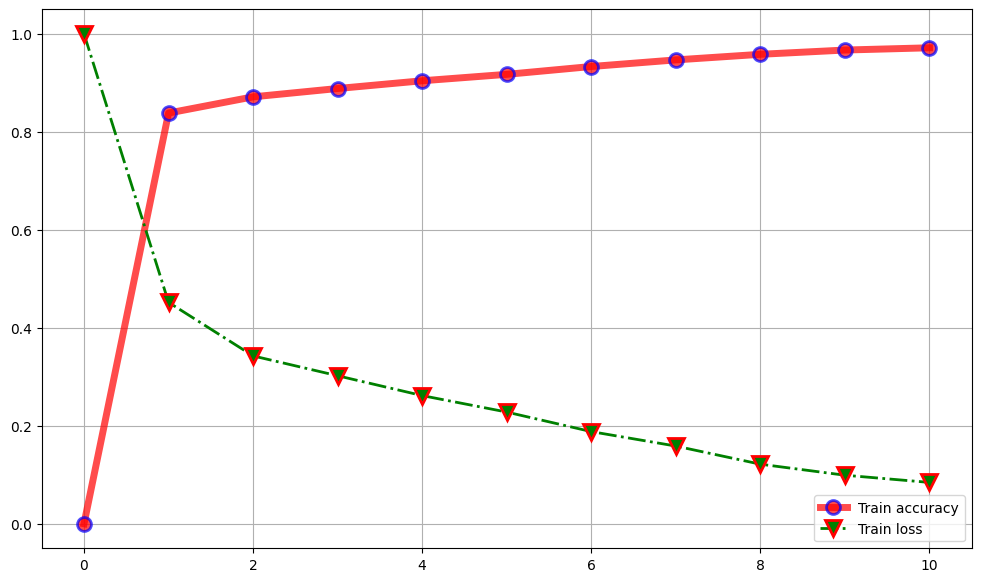

In [ ]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = [0, 0.8382 , 0.8713 , 0.8883 , 0.9041 , 0.9172, 0.9332, 0.9467, 0.9581, 0.9668, 0.9714 ]
y2 = [1, 0.4519, 0.3426, 0.3021, 0.2616, 0.2280, 0.1881 , 0.1586, 0.1216, 0.0991, 0.0844]
plt.figure(figsize=(12, 7))
plt.plot(x, y1, 'o-r', alpha=0.7, label="Train accuracy", lw=5, mec='b', mew=2, ms=10)
plt.plot(x, y2, 'v-.g', label="Train loss", mec='r', lw=2, mew=2, ms=12)
plt.legend()
plt.grid(True)

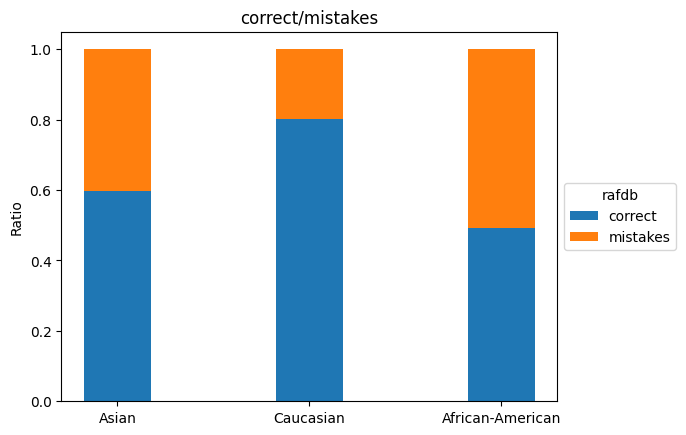

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd


correct = np.array([1-195/483, 1-466/2351, 1-119/234])
mistakes = np.array([195/483, 466/2351, 119/234])

width = 0.35
fig, ax = plt.subplots()

labels = ['Asian', 'Caucasian', 'African-American']
ax.bar(labels, correct, width, label='correct')
ax.bar(labels, mistakes, width, bottom=correct,
      label='mistakes')



ax.set_ylabel('Ratio')
ax.set_title('correct/mistakes')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='rafdb')

plt.show()

In [ ]:
total_race = np.array([18612, 14990, 13835, 13837, 13789, 12210, 10425])
total_gender = np.array([51778, 45920])
total_age = np.array([28898, 21580, 12097, 11764, 10284, 7024, 3100, 1991, 960])


fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].pie(total_gender, labels=["Male", "Female"],autopct='%1.1f%%')
axs[2].pie(total_age, labels=['0-3', '4-19', '20-39', '40-69', '70+'], autopct='%1.1f%%')
plt.title("FairFace Total")
plt.show()

# Each part nearly 33%

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import os
from tensorflow.keras import regularizers
# import tensorflow.keras.backend as K
from google.colab.patches import cv2_imshow

num_epochs = 10

fairface_data = pathlib.Path("/content/drive/MyDrive/raf3/train")
raf_test = pathlib.Path("/content/drive/MyDrive/raf3/test")
print(fairface_data)

# tf.compat.v1.keras.backend.tensorflow_backend._get_available_gpus()
print(tf.test.gpu_device_name())

all_sunflowers = list(fairface_data.glob('African/*'))
print(len(all_sunflowers))
training_batch_size=32
height,width=224,224

train_set = tf.keras.preprocessing.image_dataset_from_directory(
    fairface_data,
    validation_split=0.001,
    subset="training",
    seed=200,
    image_size=(height,width),
    batch_size=training_batch_size)

# Dataset from directory doc
# https://github.com/ageron/handson-ml2

print(train_set)

image_cat = train_set.class_names
print(image_cat)


validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    raf_test,
    validation_split=0.999,
    subset="validation",
    seed=200,
    image_size=(height, width),
    batch_size=training_batch_size)

resnet_model_new = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',
                   weights='imagenet')
for layer in pretrained_model.layers[:-15]:
        layer.trainable=False

resnet_model_new.add(pretrained_model)
resnet_model_new.add(Flatten())
resnet_model_new.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
resnet_model_new.add(Dropout(0.5))
resnet_model_new.add(BatchNormalization())
resnet_model_new.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
resnet_model_new.add(Dropout(0.5))
resnet_model_new.add(BatchNormalization())
resnet_model_new.add(Dense(3, activation='sigmoid'))

resnet_model_new.summary()

for l in resnet_model_new.layers:
    print(l.name, l.trainable)

resnet_model_new.compile(optimizer=Adam(learning_rate=0.004),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print(1)

history = resnet_model_new.fit(
    train_set,
    validation_data=validation_set,
    epochs=num_epochs
    )
# try:
#     resnet_model_new.save_weights('./checkpoints/my_checkpoint_5')
# except:
#     pass

import cv2
image=cv2.imread(str(all_sunflowers[3]))
image_resized= cv2.resize(image, (height, width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

model_pred=resnet_model_new.predict(image)
predicted_class=image_cat[np.argmax(model_pred)]
print("The predicted category is", predicted_class)


image=cv2.imread(str(all_sunflowers[4]))
image_resized= cv2.resize(image, (height, width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

model_pred=resnet_model_new.predict(image)
predicted_class=image_cat[np.argmax(model_pred)]
print("The predicted category is", predicted_class)

image=cv2.imread(str(all_sunflowers[5]))
image_resized= cv2.resize(image, (height, width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


model_pred=resnet_model_new.predict(image)
predicted_class=image_cat[np.argmax(model_pred)]
print("The predicted category is", predicted_class)

image=cv2.imread(str(all_sunflowers[6]))
image_resized= cv2.resize(image, (height, width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

model_pred=resnet_model_new.predict(image)
predicted_class=image_cat[np.argmax(model_pred)]
print("The predicted category is", predicted_class)

resnet_model_new.save_weights('./checkpoints/my_checkpoint_4')

# Cauca - 80 %
# 10 %
# 10 %

/content/drive/MyDrive/raf3/train
/device:GPU:0
9968
Found 28749 files belonging to 3 classes.
Using 28721 files for training.
<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
['African', 'Asian', 'Caucasian']
Found 3068 files belonging to 3 classes.
Using 3064 files for validation.
94765736/94765736 [==============================] - 6s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   


KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import os
from tensorflow.keras import regularizers
# import tensorflow.keras.backend as K
from google.colab.patches import cv2_imshow


fairface_data = pathlib.Path("/content/drive/MyDrive/raf1/test")
import cv2
asian = list(fairface_data.glob('Asian/*'))
caucasion = list(fairface_data.glob('Caucasian/*'))
african = list(fairface_data.glob('African/*'))


print(len(asian), len(caucasion), len(african))

asian_loss, caucasion_loss, african_loss = 0, 0, 0

array = [asian, caucasion, african]
array2 = ['Asian', 'Caucasian', 'African']
array3 = [asian_loss, caucasion_loss, african_loss]
images_failed = []

for num_array in range(len(array)):
  for i in range(len(array[num_array])):
    image=cv2.imread(str(array[num_array][i]))
    image_resized= cv2.resize(image, (height, width))
    image=np.expand_dims(image_resized,axis=0)

    model_pred=resnet_model_new.predict(image)
    predicted_class=image_cat[np.argmax(model_pred)]
    if predicted_class != array2[num_array]:
      array3[num_array] += 1
      images_failed.append(str(array[num_array][i]).split('\\')[-1])
      print(str(array[num_array][i]).split('\\')[-1])



print("FINAL RESULTS of race:")
print(images_failed)
print(array3)


# /[195, 466, 119]
# 483 2351 234
# [228, 396, 87]

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd


correct = np.array([1-228/483, 1-396/2351, 1-87/234])
mistakes = np.array([228/483, 396/2351, 87/234])

width = 0.35
fig, ax = plt.subplots()

labels = ['Asian', 'Caucasian', 'African-American']
ax.bar(labels, correct, width, label='correct')
ax.bar(labels, mistakes, width, bottom=correct,
      label='mistakes')



ax.set_ylabel('Ratio')
ax.set_title('correct/mistakes')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='rafdb')


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = [0,0.6929, 0.82, 0.8169, 0.8208, 0.8309, 0.8202, 0.8270, 0.8172, 0.7748, 0.8329]
y2 = [1, 0.7148,0.4658 , 0.49 , 0.52, 0.5393 , 0.5352 , 0.6967 , 0.7067 , 0.8011 , 0.7886 ]
plt.figure(figsize=(12, 7))
plt.plot(x, y1, 'o-r', alpha=0.7, label="Validation accuracy", lw=5, mec='b', mew=2, ms=10)
plt.plot(x, y2, 'v-.g', label="Validation loss", mec='r', lw=2, mew=2, ms=12)
plt.legend()
plt.grid(True)

In [ ]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = [0, 0.83 , 0.873 , 0.8885 , 0.9064 , 0.92, 0.9327, 0.9498, 0.9609, 0.9607, 0.9678 ]
y2 = [1, 0.4551, 0.3395, 0.3010, 0.2546, 0.2218, 0.1859 , 0.1470, 0.1130, 0.1169, 0.0931]
plt.figure(figsize=(12, 7))
plt.plot(x, y1, 'o-r', alpha=0.7, label="Train accuracy", lw=5, mec='b', mew=2, ms=10)
plt.plot(x, y2, 'v-.g', label="Train loss", mec='r', lw=2, mew=2, ms=12)
plt.legend()
plt.grid(True)